# Spotify x Billboard Five Year Analysis Project: Data Analysis

(Description)

## Imports

### Packages

In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer
from itertools import permutations
from tqdm import tqdm

### Settings

In [9]:
pd.set_option('display.max_columns', 75)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Data

In [3]:
atacj = pd.read_csv('../data/AllTracksAndChartsJoined.csv')
atacj = atacj.drop("Unnamed: 0", axis=1)
atacj

,playlist_id,playlist_name,chart_position,album_release_date,release_year,release_date_datetime,album_id,album_artist,track_name,track_id,track_popularity,track_artists,track_artists_ids,track_artists_genres,track_artists_popularity,track_explicit,track_artists_followers,album_name,danceability,energy,key,speechiness,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_artist,track_artist_id,track_artist_popularity,track_artist_followers,track_artists_genres_consolidate,main_genre,Soundtrack,Rock,Pop,Hip-hop,Edm,Latin,Indie,Christian,Country,Soul,Metal,Jazz,Folk,Funk,Misc,Easy_listening,R&B,Reggae,Show_tunes,No Genre Assigned
0,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,Sand In My Boots,4qeMbs55QlONyrE9YBMA93,42,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.354,0.540,3,0.0323,-6.625,1,0.58700,0.000000,0.1120,0.416,69.970,202133,4,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,Wasted On You,4xv9BDq764NSKG3geku9X2,42,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.505,0.658,11,0.0318,-5.240,0,0.37100,0.001360,0.1210,0.255,196.002,178520,3,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,Somebody’s Problem,7cWMnSxmQfKFsIIoRWifbb,35,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.658,0.539,5,0.0289,-7.674,1,0.66500,0.000000,0.1230,0.622,136.959,161773,4,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,More Surprised Than Me,6Mn2GFiNNadK0G2ZXRK1fd,35,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.488,0.748,6,0.0297,-6.049,1,0.24400,0.000000,0.1240,0.431,84.938,157440,4,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,2021,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,865,3lb2f27695Iuyd82khwU9k,38,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[86],False,[2789002],Dangerous: The Double Album,0.454,0.586,8,0.0253,-5.254,1,0.72900,0.000000,0.1010,0.366,87.891,190680,4,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,86,2789002,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16496,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,2017-06-09,2017,2017-06-09,4WZZDzGqjvw4bRwrp56U24,Lady A,Big Love In A Small Town,1VwuDXLQdyTWvieBIPWkNt,36,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"['contemporary country', 'country', 'country d...",[73],False,[3439689],Heart Break,0.524,0.523,1,0.0268,-5.150,1,0.64500,0.000000,0.1010,0.313,144.012,226013,4,Lady A,32WkQRZEVKSzVAAYqukAEA,73,3439689,"['Country', 'Country', 'Country', 'Pop', 'Coun...",Country,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16497,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,2017-06-09,2017,2017-06-09,4WZZDzGqjvw4bRwrp56U24,Lady A,The Stars,2gFkkpMs7rakuCCi9UepP0,37,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"['contemporary country', 'country', 'country d..."

## K Means Clustering

#### Create dataframe of features for analysis

In [5]:
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']
df = atacj[columns]

#### Set loop parameters

In [6]:
perm = permutations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)),perm))
a=[]
column_names = ["features", "score", "elbow"]
df3 = pd.DataFrame(columns = column_names)

#### Loop for permutations of feature combinations

100%|██████████| 165/165 [1:07:54<00:00, 24.70s/it]


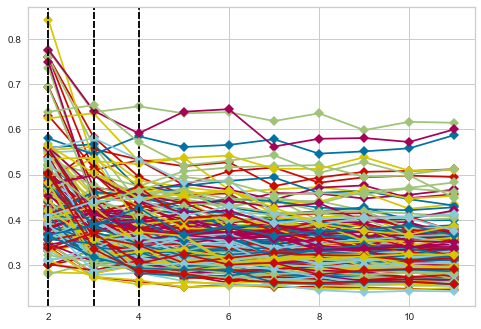

In [7]:
for i in tqdm(list(output)):
    df1 = df[[i[0], i[1], i[2]]]
    x = df1.values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)

    model = KMeans(random_state=0)
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
    visualizer.fit(x_scaled)
    score = visualizer.elbow_score_
    value = visualizer.elbow_value_
    if score>0.4:
        # visualizer.show()
        idx = df1.columns
        mylist = idx.tolist()
        dict = {
            "features": mylist,
            "score": score,
            "elbow": value
        }
        df3 = df3.append(dict, ignore_index=True)

In [10]:
visualizer.show(df3)

AttributeError: 'DataFrame' object has no attribute 'write'

<Figure size 1200x800 with 0 Axes>

## Genre Classifcation

### Using K Nearest Neighbors

#### Select the features to target

In [ ]:
atacj['target'] = atacj['main_genre']

In [ ]:
X = atacj[['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']]

In [ ]:
y = atacj.target
%store X

In [ ]:
%store y

In [ ]:
y.head()

#### Scaling features

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X, columns=X.columns)
scaled_df.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=3)

#### Elbow Method for selecting best k value:

In [ ]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predI = knn.predict(X_test)
    errorRate.append(np.mean(predI != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Attempting multiple K values for K Nearest Neighbors

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [ ]:
find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

#### Selected Optimal K value for model: 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
print(classification_report(y_test,pred))

#### Classification Scores on Test Set

In [ ]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='micro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='micro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='micro')))
    
print_metrics(y_test, preds)